# 5) Feature Selection & Engineering 
Analyse der Korrelationen und Kausalitäten, Identifikation der Features (erklärende Variablen),
ggf. Optimierung der Datengrundlage

## 5.1 Importieren der Bibliotheken 

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 5.2 Laden des Datensatzes

In [2]:
file_path = "../data/wine_quality_processed.csv"

# Prüfen, ob die Datei existiert
if os.path.exists(file_path):
    print("File found! Loading...")
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(f"Shape of the dataset: {data.shape}")
    display(data.head())
else:
    print(f"File not found at: {file_path}")

File found! Loading...
Dataset loaded successfully.
Shape of the dataset: (6497, 14)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Okay
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Okay
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Okay
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Okay
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Okay


## 5.3 Korrelationen analysieren

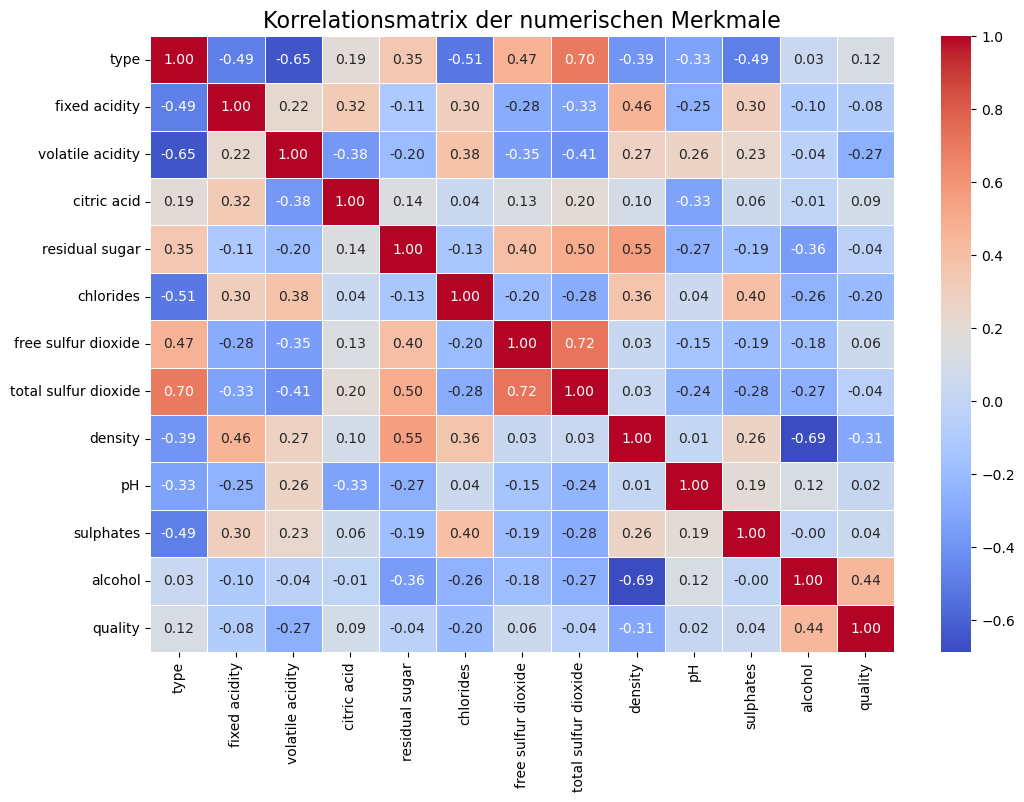


Korrelationen mit der Zielvariablen 'quality':

quality                 1.000000
alcohol                 0.444319
type                    0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [3]:
# Auswahl nur numerischer Spalten
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Korrelationsmatrix für numerische Spalten
corr_matrix = numerical_data.corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix der numerischen Merkmale", fontsize=16)
plt.show()

# Fokus auf die Zielvariable (z. B. 'quality')
print("\nKorrelationen mit der Zielvariablen 'quality':\n")
print(corr_matrix['quality'].sort_values(ascending=False))

### 5.4 Identifikation relevanter Merkmale

In [4]:
# Funktion, um relevante Merkmale basierend auf Korrelation zu identifizieren
def identify_relevant_features(corr_matrix, target, threshold=0.3):
    relevant_features = corr_matrix[target][abs(corr_matrix[target]) > threshold].drop(target)
    return relevant_features

# Identifikation relevanter Features
relevant_features = identify_relevant_features(corr_matrix, target='quality')
print("\nRelevante Features basierend auf Korrelation mit 'quality':\n")
print(relevant_features)



Relevante Features basierend auf Korrelation mit 'quality':

density   -0.305858
alcohol    0.444319
Name: quality, dtype: float64


## 5.5 Visualisierung der Zusammenhänge

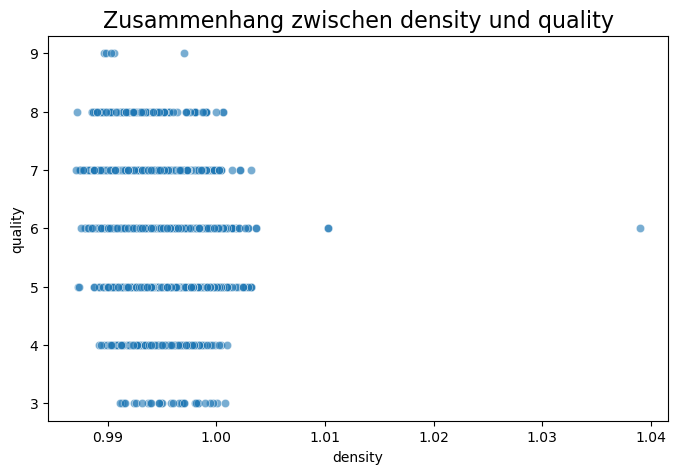

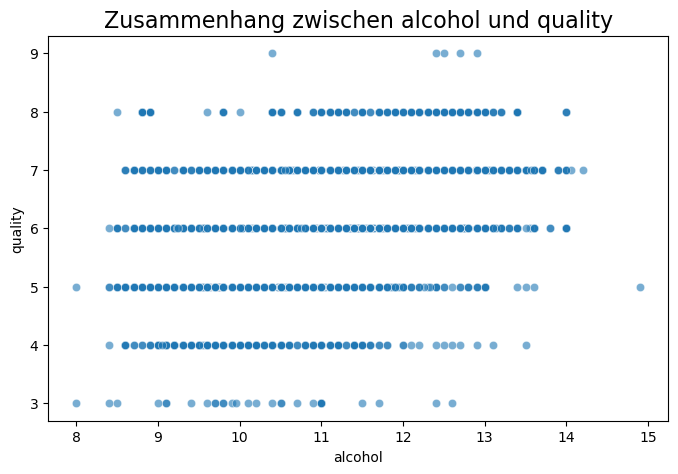

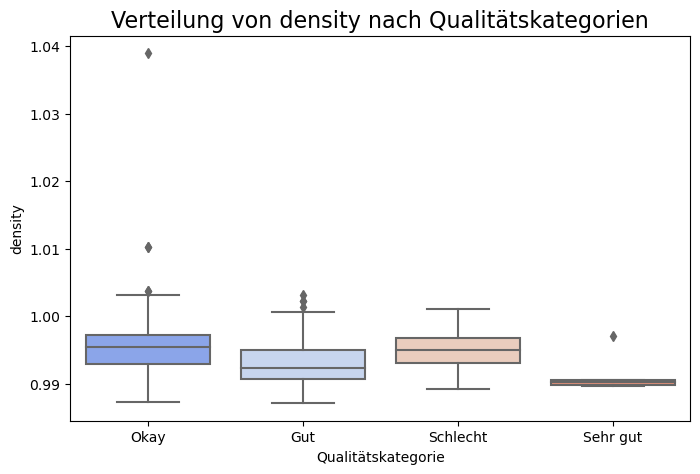

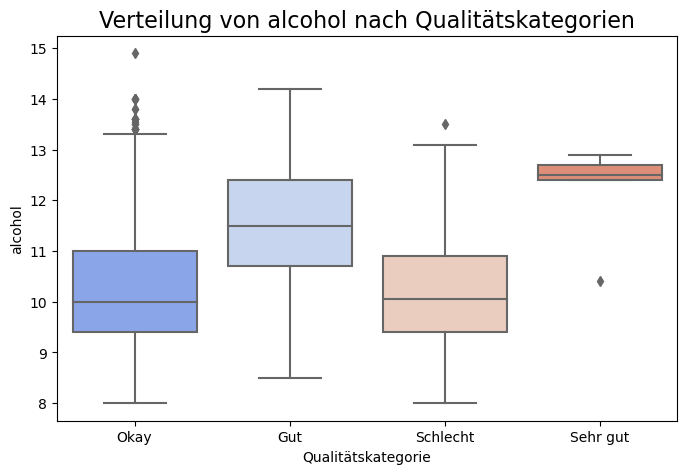

In [5]:
# Scatterplots für relevante Merkmale
for feature in relevant_features.index:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature, y='quality', data=data, alpha=0.6)
    plt.title(f"Zusammenhang zwischen {feature} und quality", fontsize=16)
    plt.xlabel(feature)
    plt.ylabel("quality")
    plt.show()

# Boxplots für kategorische Zielvariablen
for feature in relevant_features.index:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='quality_category', y=feature, data=data, palette='coolwarm')
    plt.title(f"Verteilung von {feature} nach Qualitätskategorien", fontsize=16)
    plt.xlabel("Qualitätskategorie")
    plt.ylabel(feature)
    plt.show()


## 5.6 Optimierung der Datengrundlage